# Subpart 8: Plotting the cases in India

Using plotly and cufflinks to get an interactive plot

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cufflinks as cf
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
import pylab


In [2]:
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

So the plot can be seen in a notebook and offline

In [3]:
init_notebook_mode(connected=True)
cf.go_offline()

In [13]:
total_cases = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
total_cases = total_cases[['Date','Confirmed']]
by_date = total_cases.groupby('Date').sum().reset_index()
by_date = by_date[by_date.Date >='2020-03-01']
by_date = by_date[by_date.Date <='2020-04-10']
by_date = by_date.pivot_table(index=['Date'])
by_date.iplot(title='Total cases from 1st March 2020 till 10th April 2020')

## Fitting a sigmoid curve to lockdown vs without lockdown daily cases

In [20]:
total_cases = pd.read_csv('covid_19_india.csv', parse_dates=['Date'], dayfirst=True)
total_cases = total_cases[['Date','Confirmed']]
by_date = total_cases.groupby('Date').sum().reset_index()
by_date = by_date[by_date.Date >='2020-03-01']
by_date2 = by_date
by_date2=by_date2[by_date.Date <='2020-03-22']
by_date = by_date[by_date.Date<='2020-04-10']


by_date=by_date.reset_index()
y1=by_date[['Confirmed']]
y1=y1.diff(periods=1)
y1.at[0,'Confirmed']=by_date.at[0,'Confirmed']
by_date['Confirmed_perday']=y1.Confirmed

data=by_date

by_date = by_date.pivot_table(index=['Date'])
by_date=by_date[['Confirmed_perday']]

In [21]:

by_date2=by_date2.reset_index()
y12=by_date2[['Confirmed']]
y12=y12.diff(periods=1)
y12.at[0,'Confirmed']=by_date2.at[0,'Confirmed']
by_date2['Confirmed_perday']=y12.Confirmed

data2=by_date2

by_date2 = by_date2.pivot_table(index=['Date'])
by_date2=by_date2[['Confirmed_perday']]


,Confirmed_perday
Date,
2020-03-01,3.0
2020-03-02,2.0
2020-03-03,1.0
2020-03-04,22.0
2020-03-05,2.0
2020-03-06,1.0
2020-03-07,3.0
2020-03-08,5.0
2020-03-09,7.0


In [24]:
data=by_date.set_index('Confirmed_perday')
data=data.reset_index()
data2=by_date2.set_index('Confirmed_perday')
data2=data2.reset_index()

,Confirmed_perday
0,3.0
1,2.0
2,1.0
3,22.0
4,2.0
5,1.0
6,3.0
7,5.0
8,7.0
9,12.0


In [10]:
def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y

xdata = np.array(data.index)
ydata = np.array(data['Confirmed_perday'])

xdata2 = np.array(data2.index)
ydata2 = np.array(data2['Confirmed_perday'])

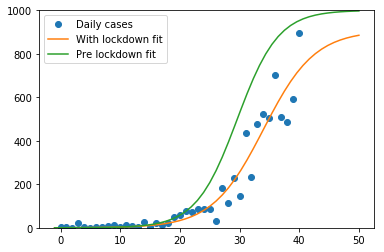

In [11]:
popt, pcov = curve_fit(sigmoid, xdata, ydata,p0=[1,1,1],bounds=(0,[ 1000,1000, 1000.]))

popt2, pcov2 = curve_fit(sigmoid, xdata2, ydata2,p0=[1,1,1],bounds=(0,[ 1000,1000, 1000.]))


x = np.linspace(-1, 50, 50)
y = sigmoid(x, *popt)

x2 = np.linspace(-1, 50, 50)
y2 = sigmoid(x2, *popt2)

pylab.plot(xdata, ydata, 'o', label='Daily cases')
pylab.plot(x,y, label='With lockdown fit')
pylab.plot(x2,y2, label='Pre lockdown fit')
pylab.ylim(-0.05, 1000)
pylab.legend(loc='best')
pylab.show()